<a href="https://colab.research.google.com/github/pds2021/a5-nicoelbert/blob/assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 20/21*
# Programming Assignment 5 - Create your own App

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a deep learning model on this data, and deploy it!

In [1]:
!pip install -Uqq fastai  # upgrade fastai on colab
from fastai.vision.all import *
from fastai.vision.widgets import *
import os, shutil

     |████████████████████████████████| 194kB 8.9MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 


__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Uni/PDS/FWF

path = Path(r'/content/drive/MyDrive/Uni/PDS/FWF')
data_path = Path(r'/content/drive/MyDrive/Uni/PDS/FWF/data')
data_path.ls()

Mounted at /content/drive
/content/drive/MyDrive/Uni/PDS/FWF


(#240) [Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AF'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AL'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/DZ'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AS'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AD'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AO'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AI'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AQ'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AG'),Path('/content/drive/MyDrive/Uni/PDS/FWF/data/AR')...]

## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


My dear friend sheldon and I are happy to welcome you to 
#Fun with Flags

<img src="http://eastward.de/wp-content/uploads/2020/12/title.png" width="500"/>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data/images :) 

In [ ]:
df_countries[df_countries['Country']=='Namibia']

,Code,Country
149,NB,Namibia


In [3]:
#in this application I'd like to classify all Flags of a 241 countries long list
#https://gist.github.com/marijn/396531/188caa065e3cd319fed7913ee3eecf5eec541918#file-countries-txt

#use testlist for whole code to improve performance
testlist = ['DE','AF','US','NL']

df_countries = pd.read_csv('/content/drive/MyDrive/Uni/PDS/FWF/countries.CSV')


dict_countrynames = df_countries.set_index('Code').to_dict()['Country']
list_countrycodes= df_countries['Code'].tolist()



#create list and Dictonary from Countries
print(list_countrycodes)
print(dict_countrynames)


#create directorys once 

"""
for cc in list_countrycodes:
  os.mkdir('data/{}'.format(cc))
"""


"""
#if needed delete directorys
for cc in list_countrycodes:
  os.rmdir('data/{}'.format(cc))
"""

#restart variable 
restart=False
redownload=False



['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR', 'AM', 'AW', 'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT', 'BO', 'BA', 'BW', 'BV', 'BR', 'IO', 'BN', 'BG', 'BF', 'BI', 'KH', 'CM', 'CA', 'CV', 'KY', 'CF', 'TD', 'CL', 'CN', 'CX', 'CC', 'CO', 'KM', 'CG', 'CD,"Congo, The Democratic Republic Of The"', 'CK', 'CR', 'CI', 'HR', 'CU', 'CY', 'CZ', 'DK', 'DJ', 'DM', 'DO', 'TP', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'TF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GN', 'GW', 'GY', 'HT', 'HM', 'VA', 'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IR,"Iran, Islamic Republic Of"', 'IQ', 'IE', 'IL', 'IT', 'JM', 'JP', 'JO', 'KZ', 'KE', 'KI', 'KP,"Korea, Democratic People\'s Republic Of"', 'KR,"Korea, Republic Of"', 'KV', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MK,"Macedonia, The Former Yugoslav Republic Of"', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', '

In [ ]:
restart=True
redownload=False

### 1. Dowload the data 
- You may use the helper functions from the lecture to get the image URLs
- Create a new folder at your defined `path`
- Use `download_image` to download the images into the corresponding (sub-)directories

In [ ]:
import requests
import re
import json
from fastcore.foundation import L
#function to return image urls for given terms from ddg -> from VL07

def search_images_ddg(key,max_n=100):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
    (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api and 
    https://github.com/fastai/fastbook/blob/master/utils.py)
    """
    url        = 'https://duckduckgo.com/'
    params     = {'q':key}
    res        = requests.post(url,data=params)
    searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
    if not searchObj: print('Token Parsing Failed !'); return
    requestUrl = url + 'i.js'
    headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0',
                 'referer': 'https://duckduckgo.com/'}
    params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
    urls       = []
    while True:
        try:
            res  = requests.get(requestUrl,headers=headers,params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                max_n = max_n - 1
                if max_n < 1: return L(set(urls))     # dedupe
            if 'next' not in data: return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass


#deletefunction from  https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder

#Function to clean a given folder

def clean_folder(key):
    dest = (path/'data/{}'.format(key))
    folder =  dest
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))


In [ ]:
i_max = len(list_countrycodes)
i=0

#Download data
if redownload:
  for cc in list_countrycodes:
    c = dict_countrynames[cc]
    dest = (path/'data/{}'.format(cc))
    dest.mkdir(exist_ok=True)
    clean_folder(cc)
    results = search_images_ddg(f'{c} flag',max_n = 50)
    download_images(dest, urls=results)
    results = search_images_ddg(f'{c} waving stick',max_n = 30)
    download_images(dest, urls=results)
    results = search_images_ddg(f'{c} national colors',max_n = 30)
    download_images(dest, urls=results)
    results = search_images_ddg(f'{c} flag stick',max_n = 30)
    download_images(dest, urls=results)
    results = search_images_ddg(f'{c} flag badge',max_n = 10)
    download_images(dest, urls=results)
    results = search_images_ddg(f'{c} flag post',max_n = 10)
    download_images(dest, urls=results)#
    i = i +1
    sys.stdout.write("\rDone with {}  - {} countries remain".format(cc,(i_max-i)))
    sys.stdout.flush()
else: print("no restart")


no restart


### 2. Verify Images
- First, create a list of all your images
- Use `verify_images` and `unlink` to remove broken images

In [ ]:
dict_filenames = {}
verify_check = True

if  redownload:
  for cc in list_countrycodes:
    fns = get_image_files(data_path/cc)
    failed = verify_images(fns)
    failed.map(Path.unlink)
    dict_filenames[cc] = get_image_files(data_path/cc) #fill dict_filenames with verified filnamesf
    print("{} contains {} files and {} are corrupt, so {} remain".format(cc,len(fns),len(failed),len(dict_filenames[cc])))
    if len(dict_filenames[cc]) != (len(fns)-len(failed)):
      print("Error: Inital, Failed and Remaing do not match!!!")
      verify_check = False

  if verify_check:
    print("Inital, Failed and Remaining match correctly")
  else: 
    print("error in match of inital, failed and remaining")

AF contains 63 files and 0 are corrupt, so 63 remain
AL contains 69 files and 0 are corrupt, so 69 remain
DZ contains 72 files and 0 are corrupt, so 72 remain
AS contains 70 files and 0 are corrupt, so 70 remain
AD contains 67 files and 0 are corrupt, so 67 remain
AO contains 70 files and 0 are corrupt, so 70 remain
AI contains 73 files and 0 are corrupt, so 73 remain
AQ contains 73 files and 0 are corrupt, so 73 remain
AG contains 66 files and 0 are corrupt, so 66 remain
AR contains 72 files and 0 are corrupt, so 72 remain
AM contains 72 files and 0 are corrupt, so 72 remain
AW contains 73 files and 0 are corrupt, so 73 remain


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


AU contains 74 files and 0 are corrupt, so 74 remain
AT contains 77 files and 0 are corrupt, so 77 remain
AZ contains 83 files and 0 are corrupt, so 83 remain
BS contains 77 files and 0 are corrupt, so 77 remain
BH contains 73 files and 0 are corrupt, so 73 remain
BD contains 75 files and 0 are corrupt, so 75 remain
BB contains 59 files and 0 are corrupt, so 59 remain
BY contains 70 files and 0 are corrupt, so 70 remain
BE contains 76 files and 0 are corrupt, so 76 remain
BZ contains 65 files and 0 are corrupt, so 65 remain
BJ contains 76 files and 0 are corrupt, so 76 remain
BM contains 73 files and 0 are corrupt, so 73 remain
BT contains 61 files and 0 are corrupt, so 61 remain
BO contains 74 files and 0 are corrupt, so 74 remain
BA contains 75 files and 0 are corrupt, so 75 remain
BW contains 78 files and 0 are corrupt, so 78 remain
BV contains 60 files and 0 are corrupt, so 60 remain
BR contains 64 files and 0 are corrupt, so 64 remain
IO contains 76 files and 0 are corrupt, so 76 

In [4]:
g = 0
for cc in list_countrycodes:
  fns = get_image_files(data_path/cc)
  g = g + len(fns)

print("There are {} images stored for {} diffrent categorys".format(g,len(list_countrycodes)))

There are 16682 images stored for 240 diffrent categorys


### 3. Create the DataBlock
For this, you need to think of:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

Use `RandomResizedCrop` for `item_tfms`with an image size of 224 px, and the appropriate `aug_transforms` as `batch_tfms`.

In [5]:
#define transformations
my_item_tfms = [RandomResizedCrop(128, min_scale=0.3), Resize(224)]

#create Datablock

db_countries = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=my_item_tfms,
    batch_tfms=aug_transforms())



### 4. Create the DataLoaders

In [6]:
# Write your code here
dls = db_countries.dataloaders(data_path,batch_size=64)

### 5. Take a look at some of your pictures. 
Does everything look as expected?

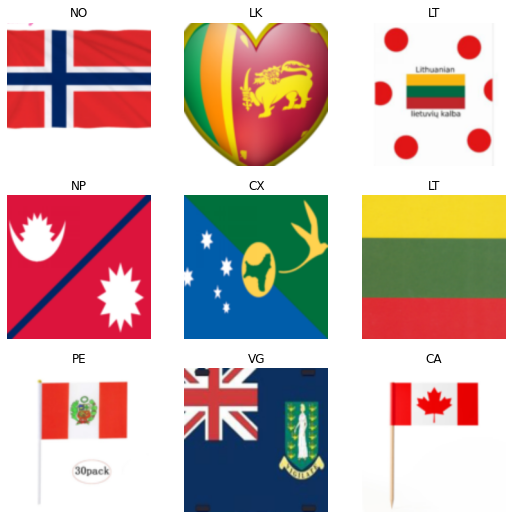

In [8]:
# Write your code here
dls.valid.show_batch(max_n=9)

In [ ]:
len(dls.vocab)

240

## Modeling

### 6. Create a learner

Create an appropriate learner for your data
- Choose an appropriate model [architecture](https://fastai1.fast.ai/vision.models.html)
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.save('stage-0')

Path('models/stage-0.pth')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


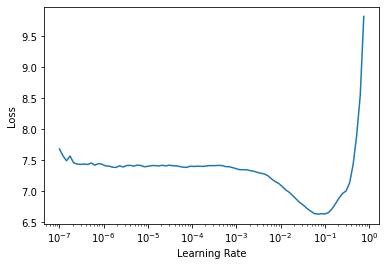

In [ ]:

if restart:
  learn.lr_find()
else: print("no restart")

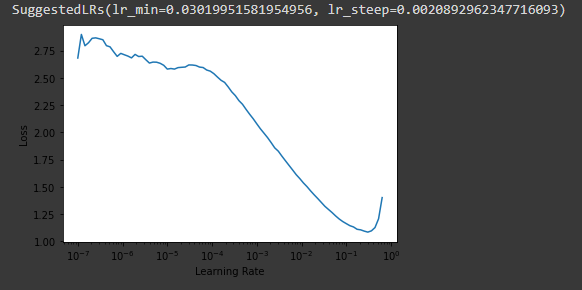

### 7. Fit the model

Use your knowdledge on model training to fit your model!

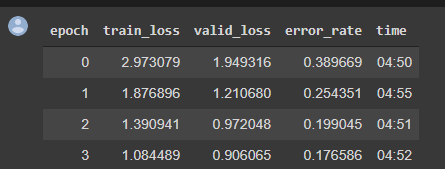

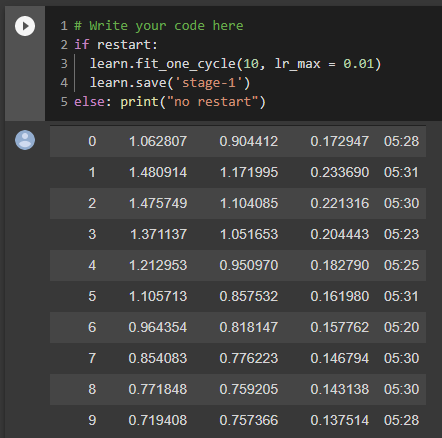

In [ ]:
# Write your code here
if restart:
  learn.fit_one_cycle(8, lr_max = 0.01)
  learn.save('stage-1')
else: print("no restart")

epoch,train_loss,valid_loss,error_rate,time
0,2.958478,1.593520,0.344169,25:45
1,2.214790,1.435695,0.296550,04:59
2,1.709163,1.159060,0.248931,04:57
3,1.440142,0.989188,0.206444,04:57
4,1.226832,0.842816,0.173938,04:57
5,0.998811,0.752072,0.150841,04:56
6,0.897418,0.700189,0.135729,04:58
7,0.812492,0.695869,0.132877,04:58


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  

check if it gets better with unfreezing

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


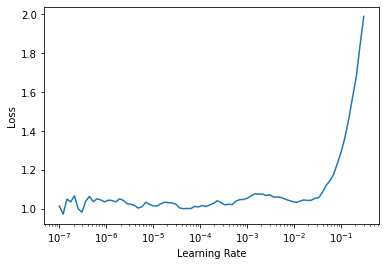

In [ ]:
if restart:
  learn.unfreeze
  learn.lr_find()
else: print("no restart")

In [ ]:
if restart:
  learn.save('stage-2')
else: print("no restart")
#doesnt 

In [ ]:
if restart:
  learn.fit_one_cycle(8, lr_max=slice(9e-7,0.003)) #slicemax according to thubrule of 1/10
  learn.save('stage-2a')
else: print("no restart")

epoch,train_loss,valid_loss,error_rate,time
0,0.766427,0.695421,0.133733,04:57
1,0.868196,0.704561,0.138865,04:59
2,0.818198,0.706358,0.144283,04:57
3,0.803692,0.681591,0.134018,04:55
4,0.751823,0.670234,0.132877,04:58
5,0.693161,0.667457,0.133447,05:01
6,0.650684,0.662237,0.134588,05:02
7,0.641900,0.660687,0.131166,04:58


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  

### 8. Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

In [7]:
if True:
  learn = cnn_learner(dls, resnet18, metrics=error_rate)
  learn.load('stage-2a')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


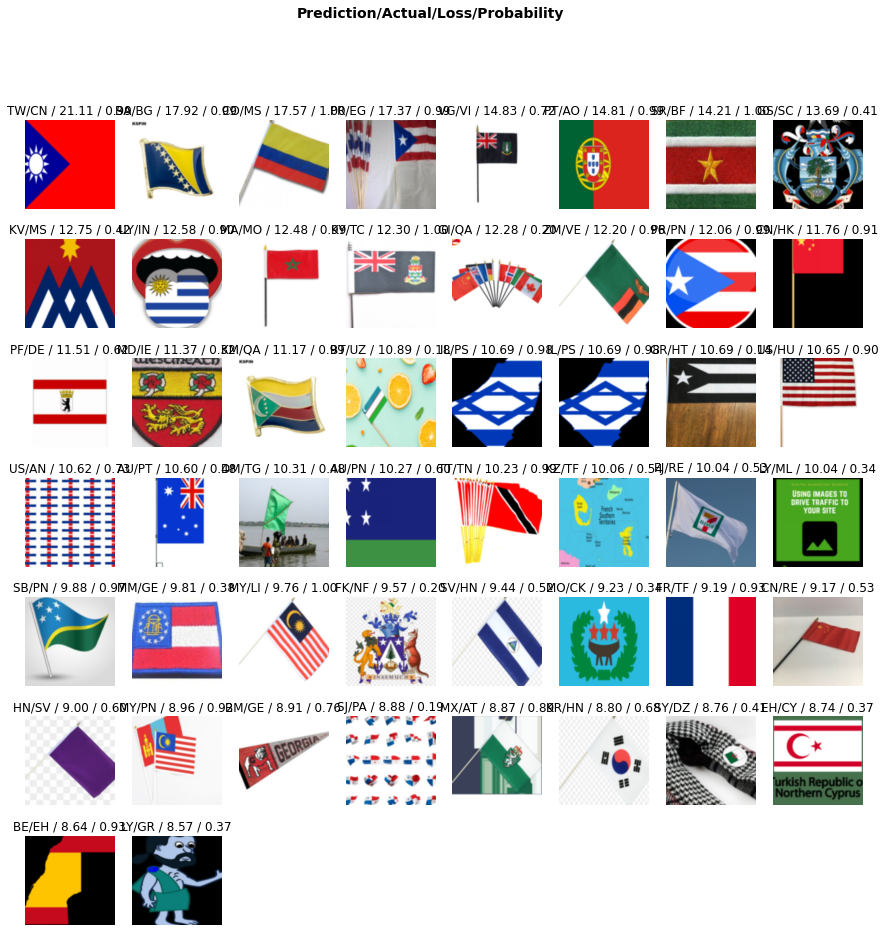

In [ ]:
# Write your code here
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(50, figsize=(15,15))

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn, max_n = 10)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


##validate with own images


In [ ]:
import ntpath
ntpath.basename("/content/drive/MyDrive/Uni/PDS/FWF/data/validation")

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)


test_path = Path(r'/content/drive/MyDrive/Uni/PDS/FWF/validation')
test_path.ls()


fnames = get_image_files(test_path)

for f in fnames:
  image_file = Path(r'{}'.format(f))
  prediction = learn.predict(image_file, )
  filename =  path_leaf(f)[0:-4] #extracted file without.jpg ending
  prediction_name = prediction[0]
  print('{} was predicted as {}'.format(filename,prediction_name))



### 9. Clean your data

Based on the evaluation, you may want to clean your data using the `ImageClassifierCleaner`.
- Remeber to delete the selected data after using the cleaner:
    ```python
    for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    ```
    
    
- Once we've cleaned up our data, we can retrain our model. 



In [ ]:
# Write your code here

## Turning Your Model into an Online Application

Now, take your app into production. You can follow the steps from the lecure:

- Export your model via `learn.export`
- Upload your model to [Github Releases](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/about-releases) to make it publicly available at your repository.
- Create and upload a new notebook that only contains the necassary code and IPython widgets for your App. 
    - Remeber to download the exported model from *Github Releases*
    - Include a brief description of your app and the functionalities
- Publish your web app on [Binder](https://mybinder.org/) using Voilà

You can use the [example](https://github.com/pds2021/course/blob/main/nbs/07_Bear_App.ipynb) from the lecture as an orientation.

If you're familiar with the world of web application development, you're free to use these skills and all your tools and ressources!

In [11]:
# Write your code here
learn.export()

In [13]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab



['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AN', 'AO', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BM', 'BN', 'BO', 'BR', 'BS', 'BT', 'BV', 'BW', 'BY', 'BZ', 'CA', 'CC', 'CD', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CX', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FK', 'FM', 'FO', 'FR', 'GA', 'GB', 'GD', 'GE', 'GF', 'GH', 'GI', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GS', 'GT', 'GU', 'GW', 'GY', 'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IO', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KR', 'KV', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NB', 'NC', 'NE', 'NF', 'NG', 'NI', 'NL', 'NO', 'NP', 'NR', 'NU', 'NZ', 'OM', 'PA

## Finally, Provide a Link to Your App

In [ ]:
# Provide the link to your web app
https://mybinder.org/v2/gh/nicoelbert/funwithflags/HEAD?urlpath=%2Fvoila%2Frender%2Ffwf_app.ipynb

#github repo
https://github.com/nicoelbert/funwithflags
